### Cts-Genome Coverage Plots

In [1]:
import pandas as pd

In [2]:
home_dir = '/home/douso/SarsGenomics/Processed'
df_cov = pd.read_excel(f'{home_dir}/metadata-seq-MS-Merge@KB8.xlsx', usecols=['S_NUM', 'G_COV'])

In [3]:
df_cov

,S_NUM,G_COV
0,COVC00854,94.8
1,COVC00867,66.7
2,COVC00893,82.6
3,COVC00915,NaN
4,COVC00962,93.3
...,...,...
1065,COVC24209,91.8
1066,COVC24214,96.7
1067,COVC24215,90.1
1068,COVC24216,94.6


In [4]:
samp_names = list(df_cov['S_NUM'])

In [5]:
df_Cts = pd.read_excel('/home/douso/Documents/RunSheets/Cts/runsheet-cts.xlsx')[['Sample_Name', 'Ct_Mean']]
# df_nhrl_Cts = pd.read_excel('/home/douso/Documents/RunSheets/Cts/NHRL-cts.xlsx')
# df_Cts = df_covc_Cts.append(df_nhrl_Cts)

In [6]:
df_ct_cov = (df_Cts.merge(df_cov, how='inner', left_on='Sample_Name', 
            right_on='S_NUM').drop('S_NUM',axis=1).sort_values('Ct_Mean').dropna())#[df_Cts['Sample_Name'].isin(samp_names)]

In [7]:
# df_ct_cov.to_excel('/home/douso/Documents/RunSheets/Cts/cts-cov.xlsx', index=False, float_format='%.0f')

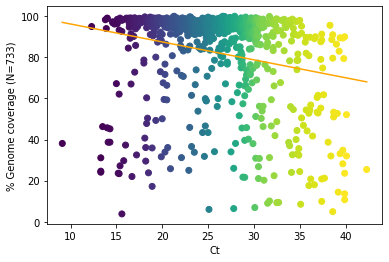

In [8]:
import matplotlib.pyplot as plt, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(np.array(df_ct_cov['Ct_Mean']).reshape(-1, 1), df_ct_cov['G_COV'])

y_predicted = lr.predict(np.array(df_ct_cov['Ct_Mean']).reshape(-1, 1))

plt.plot(df_ct_cov['Ct_Mean'], y_predicted, color='orange')

plt.scatter(df_ct_cov['Ct_Mean'], df_ct_cov['G_COV'], 
            c=np.linspace(0, 40, len(df_ct_cov['Ct_Mean'])), 
            cmap='viridis')#viridis#RdYlBu
# plt.colorbar(label='Cts', location='bottom')
plt.xlabel('Ct')
plt.ylabel(f'% Genome coverage (N={len(df_ct_cov["Ct_Mean"])})')
plt.show()